In [20]:
import numpy as np
from math import log, sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline
Abs = np.vectorize(abs)

In [31]:
df = pd.read_csv('2013_movies.csv')
df['constant'] = 1
df.dropna(inplace=True)

In [32]:
df.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate', 'constant'],
      dtype='object')

In [33]:
m = LinearRegression()

In [39]:
m.fit(df[['constant']], df['DomesticTotalGross'])
p1 = m.predict(df[['constant']])
print('Mean squared error: %s' % mean_squared_error(p1, df.DomesticTotalGross))

Mean squared error: 7.65032498249e+15


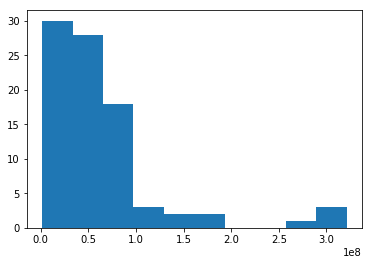

In [40]:
plt.hist(Abs(df.DomesticTotalGross - p1));

In [52]:
m.fit(df[['Budget']], df['DomesticTotalGross'])
p2 = m.predict(df[['Budget']])
print('Features: Budged \nMean squared error: %s' % mean_squared_error(p2, df.DomesticTotalGross))

Features: Budged 
Mean squared error: 5.4906353563e+15


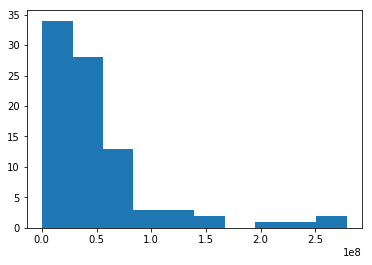

In [42]:
plt.hist(Abs(df.DomesticTotalGross - p2));

In [47]:
def rating_to_num(s):
    if s == 'PG':
        return 1
    if s == 'PG-13':
        return 2
    if s == 'R':
        return 3
    

In [48]:
df['rating_num'] = df['Rating'].apply(rating_to_num)

In [51]:
m.fit(df[['Budget', 'rating_num']], df['DomesticTotalGross'])
p3 = m.predict(df[['Budget', 'rating_num']])
print('Features: Budget and Rating \nMean squared error: %s' % mean_squared_error(p3, df.DomesticTotalGross))

Features: Budget and Rating 
Mean squared error: 5.47723955174e+15


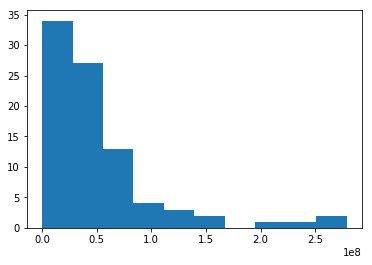

In [53]:
plt.hist(Abs(df.DomesticTotalGross - p3));

In [54]:
m.fit(df[['Budget', 'rating_num', 'Runtime']], df['DomesticTotalGross'])
p4 = m.predict(df[['Budget', 'rating_num', 'Runtime']])
print('Features: Budget, Rating, and Runtime \nMean squared error: %s' % mean_squared_error(p4, df.DomesticTotalGross))

Features: Budget, Rating, and Runtime 
Mean squared error: 5.40774362042e+15


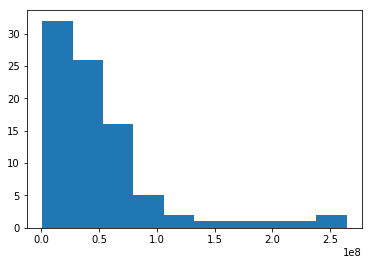

In [55]:
plt.hist(Abs(df.DomesticTotalGross - p4));

In [59]:
x_cols = ['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating', 'rating_num', 'Runtime', 'ReleaseDate', 'constant']
X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df[['DomesticTotalGross']])

In [66]:
m.fit(X_train[['Budget']], y_train)
p5 = m.predict(X_test[['Budget']])
print('Features: Budget \nMSE on Test Set: %s' % mean_squared_error(p5, y_test))

Features: Budget 
MSE on Test Set: 5.94187142298e+15


In [67]:
m.fit(X_train[['Budget', 'Runtime']], y_train)
p6 = m.predict(X_test[['Budget', 'Runtime']])
print('Features: Budget, Runtime \nMSE on Test Set: %s' % mean_squared_error(p6, y_test))

Features: Budget, Runtime 
MSE on Test Set: 5.86083249666e+15


In [68]:
m.fit(X_train[['Budget', 'rating_num', 'Runtime']], y_train)
p7 = m.predict(X_test[['Budget', 'rating_num', 'Runtime']])
print('Features: Budget, Runtime, Rating\nMSE on Test Set: %s' % mean_squared_error(p7, y_test))

Features: Budget, Runtime, Rating
MSE on Test Set: 5.82857190426e+15
